# Velocidades Radiales

## Resumen

En esta práctica vamos a medir una serie de líneas espectrales de la estrella gigante tipo O HD 156292. Vamos a reconocer las líneas presentes y medirlas mediante las facilidades del python. Luego, analizaremos el comportamiento de las velocidades radiales determinadas a partir del efecto Doppler.

In [32]:
# Cargar los espectros usando specutils.
import os
from specutils import Spectrum1D

spec1 = Spectrum1D.read("TP7/1.fits")
spec2 = Spectrum1D.read("TP7/2.fits")
spec3 = Spectrum1D.read("TP7/3.fits")
spec4 = Spectrum1D.read("TP7/4.fits")
spec5 = Spectrum1D.read("TP7/5.fits")
spec6 = Spectrum1D.read("TP7/6.fits")
spec7 = Spectrum1D.read("TP7/7.fits")
spec8 = Spectrum1D.read("TP7/8.fits")
spec9 = Spectrum1D.read("TP7/9.fits")
spec10 = Spectrum1D.read("TP7/10.fits")

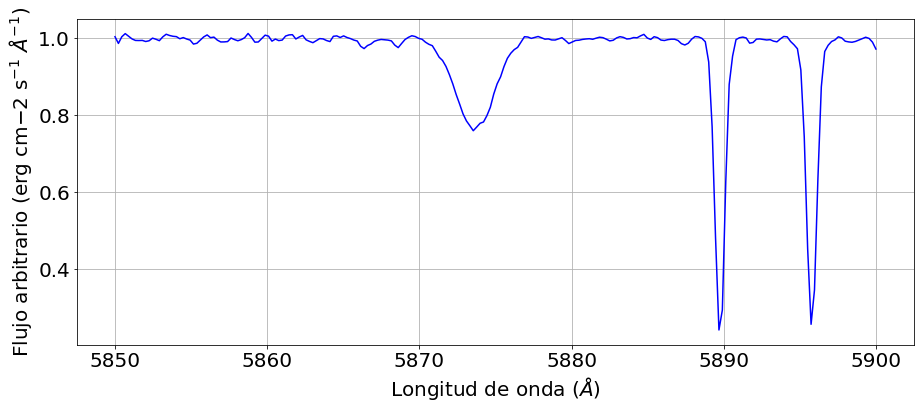

In [51]:
# Ploteo el espectro que quiero
#
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]
plt.rcParams.update({'font.size': 20})
#
# Elijo qué espectro quiero graficar
espectro = spec1
plt.plot(espectro.spectral_axis, espectro.flux, c='blue')
plt.xlabel('Longitud de onda ($\AA$)')
plt.ylabel('Flujo arbitrario (erg cm${-2}$ s$^{-1}$ $\AA^{-1}$)')
plt.grid()
plt.show()

Para analizar el conjunto de datos que tengo, puedo querer ver todos los espectros juntos. Los espectros que utilizamos en esta práctica están "normalizados" y calibrados en longitud de onda, pero sin corregir por los movimientos "relativos".

#### Ejercicio 1. 

Explique a cuáles movimientos nos referimos. La velocidad radial que se puede determinar a partir de estos espectros: ¿qué representa?

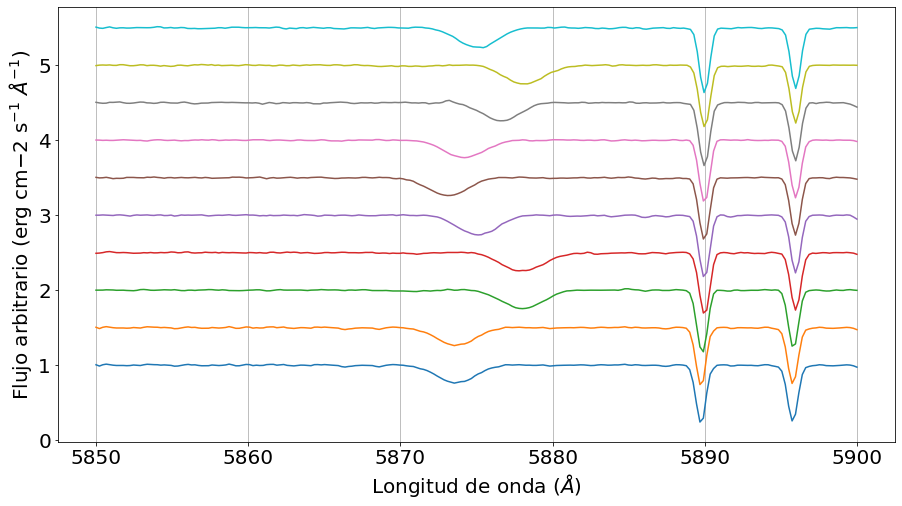

In [52]:
# Ploteo todas las que quiero teniendo cuidado en desplazarlos algo en "flujo"
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

plt.xlabel('Longitud de onda ($\AA$)')
plt.ylabel('Flujo arbitrario (erg cm${-2}$ s$^{-1}$ $\AA^{-1}$)')
plt.plot(spec1.spectral_axis, spec1.flux) #, c='black')
plt.plot(spec1.spectral_axis, spec1.flux+0.5)
plt.plot(spec3.spectral_axis, spec3.flux+1.0)
plt.plot(spec4.spectral_axis, spec4.flux+1.5)
plt.plot(spec5.spectral_axis, spec5.flux+2.0)
plt.plot(spec6.spectral_axis, spec6.flux+2.5)
plt.plot(spec7.spectral_axis, spec7.flux+3.0)
plt.plot(spec8.spectral_axis, spec8.flux+3.5)
plt.plot(spec9.spectral_axis, spec9.flux+4.0)
plt.plot(spec10.spectral_axis, spec10.flux+4.5)

# Algunos modificadores de interés: 
plt.grid(axis='x')
plt.show()

#### Ejercicio 2.

Mida las velocidades radiales de las tres líneas identificadas en el espectro. Sabiendo que pertenecen a:
 
* He I 5875.62 Å

* Na I 5889.95 Å

* Na I 5895.92 Å

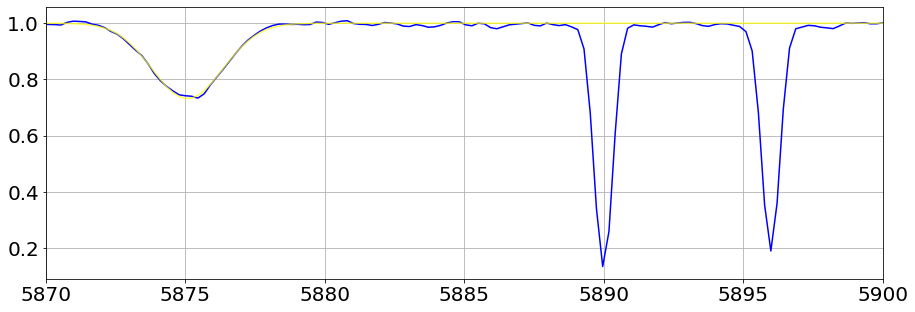

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 225
    # variables        = 3
    chi-square         = 3.71531723
    reduced chi-square = 0.01673566
    Akaike info crit   = -917.318176
    Bayesian info crit = -907.069874
[[Variables]]
    amp:    -0.26805677 +/- 0.04984987 (18.60%) (init = -0.7)
    centro:  5875.07314 +/- 0.27316666 (0.00%) (init = 5875)
    wid:     3.23800954 +/- 1.39008365 (42.93%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) =  0.577


In [150]:
from lmfit.models import GaussianModel
from numpy import exp 
from scipy.optimize import curve_fit
from lmfit import Model

data = spec10
x = data.spectral_axis
y = data.flux

# Defino el ajuste
def gaussian(x, amp, centro, wid):
     return 1 + amp * exp(-(x-centro)**2 / wid)

# Hay que modificar "centro" para elegir la línea que se quiere medir (y posiblemente la amplitud, "amp")
# si da error es porque alguna de las variables "amp", "centro" o "wid" están mal
gmodel = Model(gaussian)
result = gmodel.fit(y, x=x, amp=-0.7, centro=5875, wid=1)

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(x, y, c='blue')
plt.plot(x, result.best_fit, c='yellow', alpha=0.7)
plt.grid()
plt.xlim(5870,5900)
plt.show()
print(result.fit_report())

In [151]:
# Puedo ir almacenando los valores en una "tablita", llenando los valores "a mano". 
import pandas as pd
tablita = pd.DataFrame()
tablita.at[1, 'HeI'] = 5873.65459
tablita.at[2, 'HeI'] = 5876.02513
tablita.at[3, 'HeI'] = 5878.02133
tablita.at[4, 'HeI'] = 5878.02952
tablita.at[5, 'HeI'] = 5875.08939
tablita.at[6, 'HeI'] = 5873.11565
tablita.at[7, 'HeI'] = 5874.20345
tablita.at[8, 'HeI'] = 5876.61575
tablita.at[9, 'HeI'] = 5878.15158
tablita.at[10, 'HeI'] = 5875.07314

In [152]:
# Obtener una lista de HJD y VHELIO para cada espectro.
from astropy.io import fits
import pandas as pd

for i in range(1,11):
  hdul = fits.open('TP7/'+str(i) + '.fits')
#  print (str(i) + '.fits', hdul[0].header['HJD'], hdul[0].header['VHELIO'])
  tablita.at[i,'espectro'] = str(i)+ '.fits'
  tablita.at[i, 'HJD'] = hdul[0].header['HJD']
  tablita.at[i, 'VHELIO'] = hdul[0].header['VHELIO']
tablita['HJD'] = tablita['HJD'].map('{:.5f}'.format)
print(tablita)

           HeI espectro            HJD     VHELIO
1   5873.65459   1.fits  2454642.80305  -5.876512
2   5876.02513   2.fits  2454643.74906  -6.297505
3   5878.02133   3.fits  2454644.77018  -6.734611
4   5878.02952   4.fits  2454659.74458 -13.286740
5   5875.08939   5.fits  2454660.68801 -13.583356
6   5873.11565   6.fits  2454661.69889 -14.023619
7   5874.20345   7.fits  2454662.72271 -14.472399
8   5876.61575   8.fits  2454663.61115 -14.628862
9   5878.15158   9.fits  2454664.62480 -15.049856
10  5875.07314  10.fits  2454665.63529 -15.475019


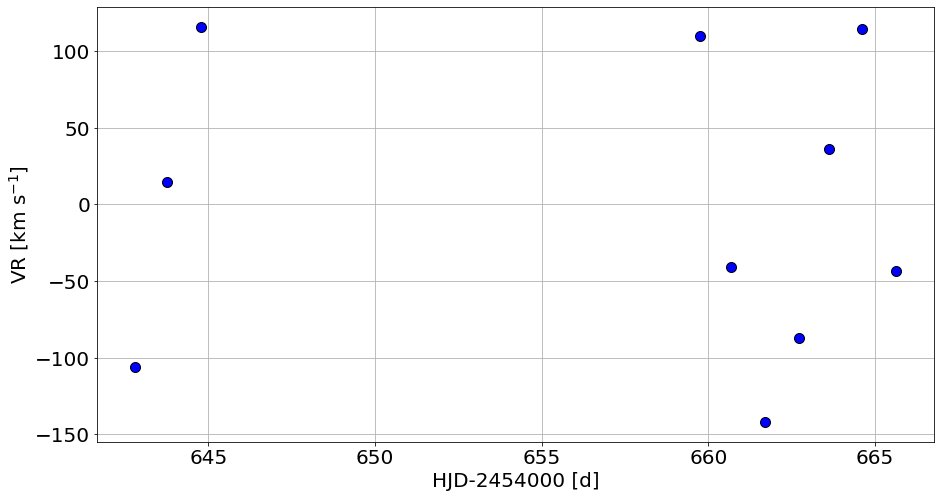

In [164]:
#Ploteo las VRs
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15, 8]
# Calculo VRs aplicando Doppler.
tablita['VR_HeI'] = (tablita['HeI']-5875.62)/5875.62*300000+tablita['VHELIO']
tablita['HJD'] = pd.to_numeric(tablita['HJD'], errors='coerce')
tablita['HJDx'] = tablita['HJD']-2454000.0
plt.scatter(data=tablita, x='HJDx', y='VR_HeI',alpha=1, edgecolors='black', c='blue', s=100, label='He I')
plt.grid()
plt.ylabel('VR [km s$^{-1}$]')
plt.xlabel('HJD-2454000 [d]')
plt.show()

#### Ejercicio 3.

Calcule el período de las variaciones en velocidad radial. Utilice la herramienta provista por NASA: (https://exoplanetarchive.ipac.caltech.edu/cgi-bin/Pgram/nph-pgram).

Escriba un informe de todo lo realizado.

In [159]:
# Genero otra tabla para guardar solo lo que quiero
tabla_final = pd.DataFrame()
tabla_final['HJD'] = tablita['HJD']
tabla_final['VR_HeI'] = tablita['VR_HeI']
tabla_final.to_csv('ztabla_final.tsv', sep = ' ', header=False, index=False)

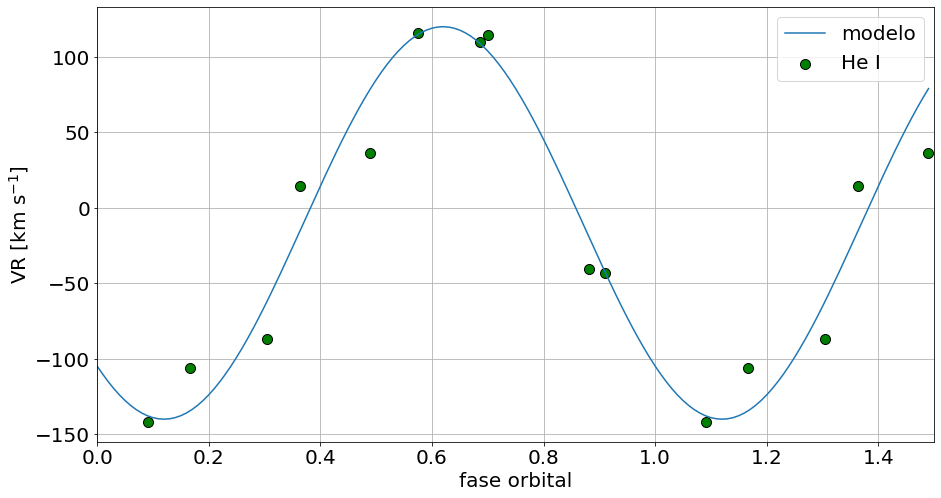

In [218]:
#Ploteo las VRs según la fase orbital
import matplotlib.pyplot as plt
import numpy as np
import math
from math import floor

plt.rcParams['figure.figsize'] = [15, 8]
periodo = 4.81391990
tablita['fase'] = ((tablita['HJD']-2454642.0)/periodo)-np.floor((tablita['HJD']-2454642.0)/periodo)
plt.scatter(data=tablita, x='fase', y='VR_HeI',alpha=1, edgecolors='black', c='green', s=100, label='He I')
tablita['fase'] = tablita['fase'] +1
plt.scatter(data=tablita, x='fase', y='VR_HeI',alpha=1, edgecolors='black', c='green', s=100, label='')
plt.grid()
plt.ylabel('VR [km s$^{-1}$]')
plt.xlabel('fase orbital')
plt.xlim(0,1.5)
#
# Solo para jugar. Se puede determinar una sinusoide que representa el movimiento obital.
x = np.arange(0,1.5,0.01)
k = 130.0
v0 = -10.0
y = k * np.sin(2*np.pi*(x-0.37))+v0
plt.plot(x,y, label='modelo')
plt.legend()
plt.show()